# Aztec G-dDT Test Run

## Introduction 

In this notebook, we give a demonstration of the types of data that can be generated using the Aztec GDDT cadCAD simulation model.

In [2]:
# Importing Necessary Libraries

import sys
sys.path.append('../')

import pandas as pd
import os
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

import plotly.io as pio
pio.renderers.default = "png"

## Running the Model 

In a future version, we will provide information on how the user can input their own parameter choices) to the `sim_run` function (found in the  [utils.py]() file in this repository). 

For the purposes of this demonstration notebook, we run the model according to a standard predefined set of input parameters. 

In [3]:
from aztec_gddt.experiment import standard_run

sim_df = standard_run()

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html




                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.5.1
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 700, 26, 1, 13)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (700, 26, 1, 13)


Initializing configurations: 100%|██████████| 1/1 [00:00<00:00, 57.76it/s]


Execution Method: single_proc_exec
Execution Mode: single_threaded


Flattening results:   0%|          | 1/4201 [00:00<02:05, 33.57it/s]

Total execution time: 6.76s


## Accessing the Data 

The data produced by the cadCAD simulation model, along with associated metrics, is stored in a dataframe with multiple variables. In future versions, the KPI calculations will also be produced during the simulation run. 

In [4]:
sim_df.head(4)

,time_l1,delta_l1_blocks,advance_l1_blocks,agents,current_process,transactions,gas_fee_l1,gas_fee_blob,finalized_blocks_count,cumm_block_rewards,...,commit_bond_reveal_probability,gas_threshold_for_tx,blob_gas_threshold_for_tx,proving_marketplace_usage_probability,rewards_to_provers,rewards_to_relay,gwei_to_tokens,gas_estimators,tx_estimators,slash_params
0,0,0,0,{9b616898-ed28-4a9c-899c-e4458a13259f: Agent(u...,None,{},50,7,0,200.0,...,0.2,70,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa..."
6,1,0,0,{9b616898-ed28-4a9c-899c-e4458a13259f: Agent(u...,Process(uuid=UUID('401d825a-a0be-4cf9-94ff-51a...,{},50,7,0,200.0,...,0.2,70,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa..."
12,2,0,0,{9b616898-ed28-4a9c-899c-e4458a13259f: Agent(u...,Process(uuid=UUID('401d825a-a0be-4cf9-94ff-51a...,{},50,7,0,200.0,...,0.2,70,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa..."
18,3,0,0,{9b616898-ed28-4a9c-899c-e4458a13259f: Agent(u...,Process(uuid=UUID('401d825a-a0be-4cf9-94ff-51a...,{5c12f1ea-1eea-4c04-adc1-dc9b8d7ecf84: Proposa...,50,7,0,200.0,...,0.2,70,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa..."


The data from this run can be saved to a `.csv` file. This is useful for e.g. combining results from experiments with different parameter choices. 

In [5]:
sim_df.to_csv("test_data.csv")

## Visual Analysis

In this section we demonstrate several graphical plots that can easily be generated from the data produced by the simulation model runs.

<Axes: xlabel='time_l1', ylabel='current_process'>

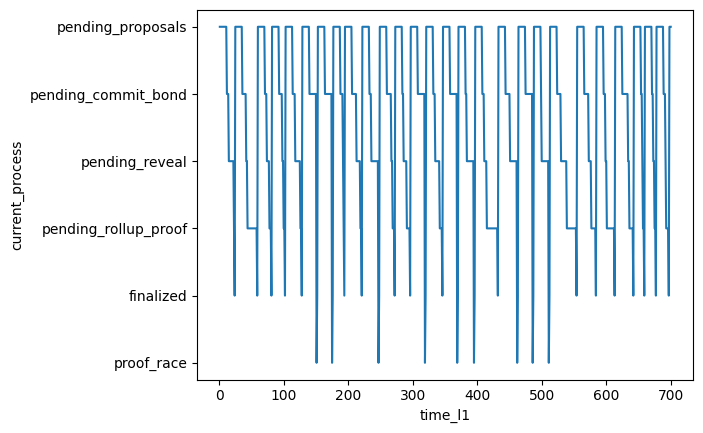

In [6]:
sns.lineplot(x=sim_df.time_l1, 
             y=sim_df.current_process.map(lambda x: x.phase.name if x is not None else None))

We have access to data on finalized blocks over time. In addition, the plots can be saved for further analysis and comparison. Here we create a plot of finalized blocks vs. time and save it in a relevant png file. (Again, this shows capability, not actual results, due to parameter choices.)

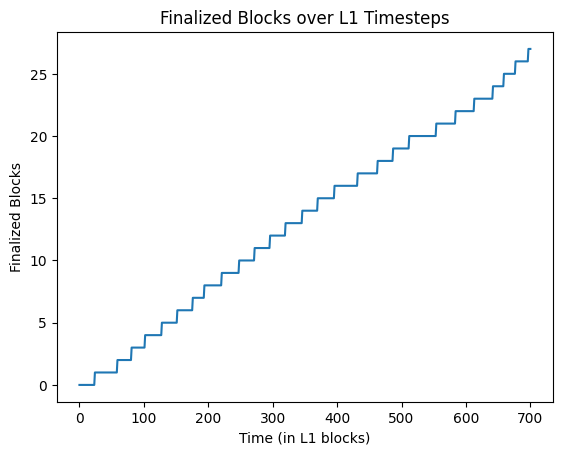

In [7]:
sns.lineplot(x=sim_df.time_l1, 
             y=sim_df.finalized_blocks_count)
             
plt.xlabel("Time (in L1 blocks)")
plt.ylabel("Finalized Blocks")
plt.title("Finalized Blocks over L1 Timesteps")
plt.show()

In [8]:
plt.savefig("finalized_blocks_plot.png")

<Figure size 640x480 with 0 Axes>

Among other things, the data generated by the simulation also makes it possible to track the growth rate of blocks produced, as well as the rewards accrued to different types of agents in the system. 

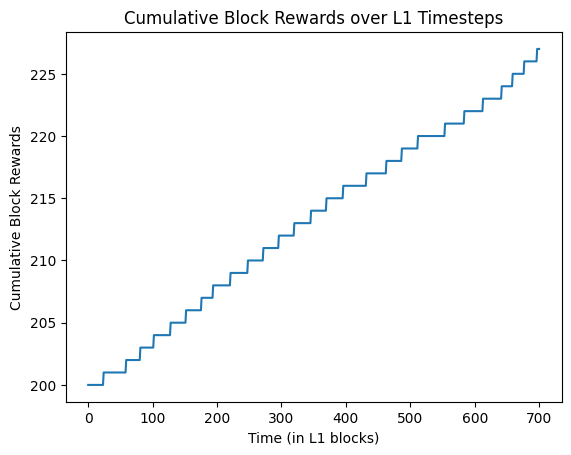

In [9]:
sns.lineplot(x=sim_df.time_l1, 
             y=sim_df.cumm_block_rewards)

plt.xlabel("Time (in L1 blocks)")
plt.ylabel("Cumulative Block Rewards")
plt.title("Cumulative Block Rewards over L1 Timesteps")
plt.savefig("cum_block_rewards_over_time.png")
plt.show()

In [10]:
sim_df['balance_sequencers'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_sequencer == True))
sim_df['balance_provers'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_prover == True))
sim_df['balance_relays'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_relay == True))
sim_df['balance_burnt'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.uuid == 'burnt'))
sim_df['balance_l1_builder'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.uuid == 'l1-builder'))


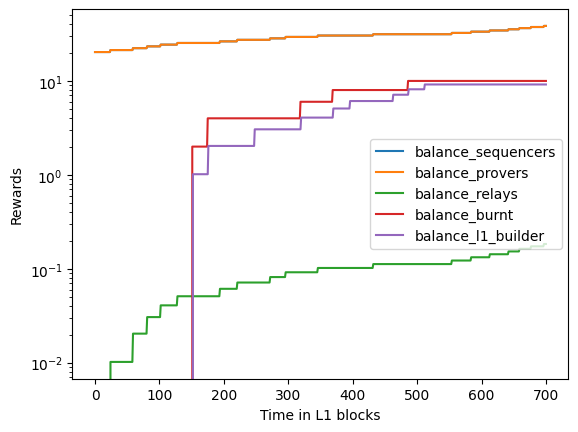

In [11]:
sim_df.plot(
         x='time_l1',
         y=['balance_sequencers',
           'balance_provers',
           'balance_relays',
           'balance_burnt',
           'balance_l1_builder'],
        )
plt.xlabel("Time in L1 blocks")
plt.ylabel("Rewards")
plt.yscale("log")
plt.show()